In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score

1. Loading data

In [2]:
cols = ["Relative Compactness", "Surface Area", "Wall Area", "Roof Area", "Overall Height","Orientation", "Glazing Area", "Glazing Area Distribution", "Heating Load", "Cooling Load"]
dataset = pd.read_excel("energy_efficient.xlsx", names=cols)

1.1 Exploratory Data Analysis

In [3]:
dataset.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [4]:
dataset.describe()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative Compactness       768 non-null    float64
 1   Surface Area               768 non-null    float64
 2   Wall Area                  768 non-null    float64
 3   Roof Area                  768 non-null    float64
 4   Overall Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing Area               768 non-null    float64
 7   Glazing Area Distribution  768 non-null    int64  
 8   Heating Load               768 non-null    float64
 9   Cooling Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


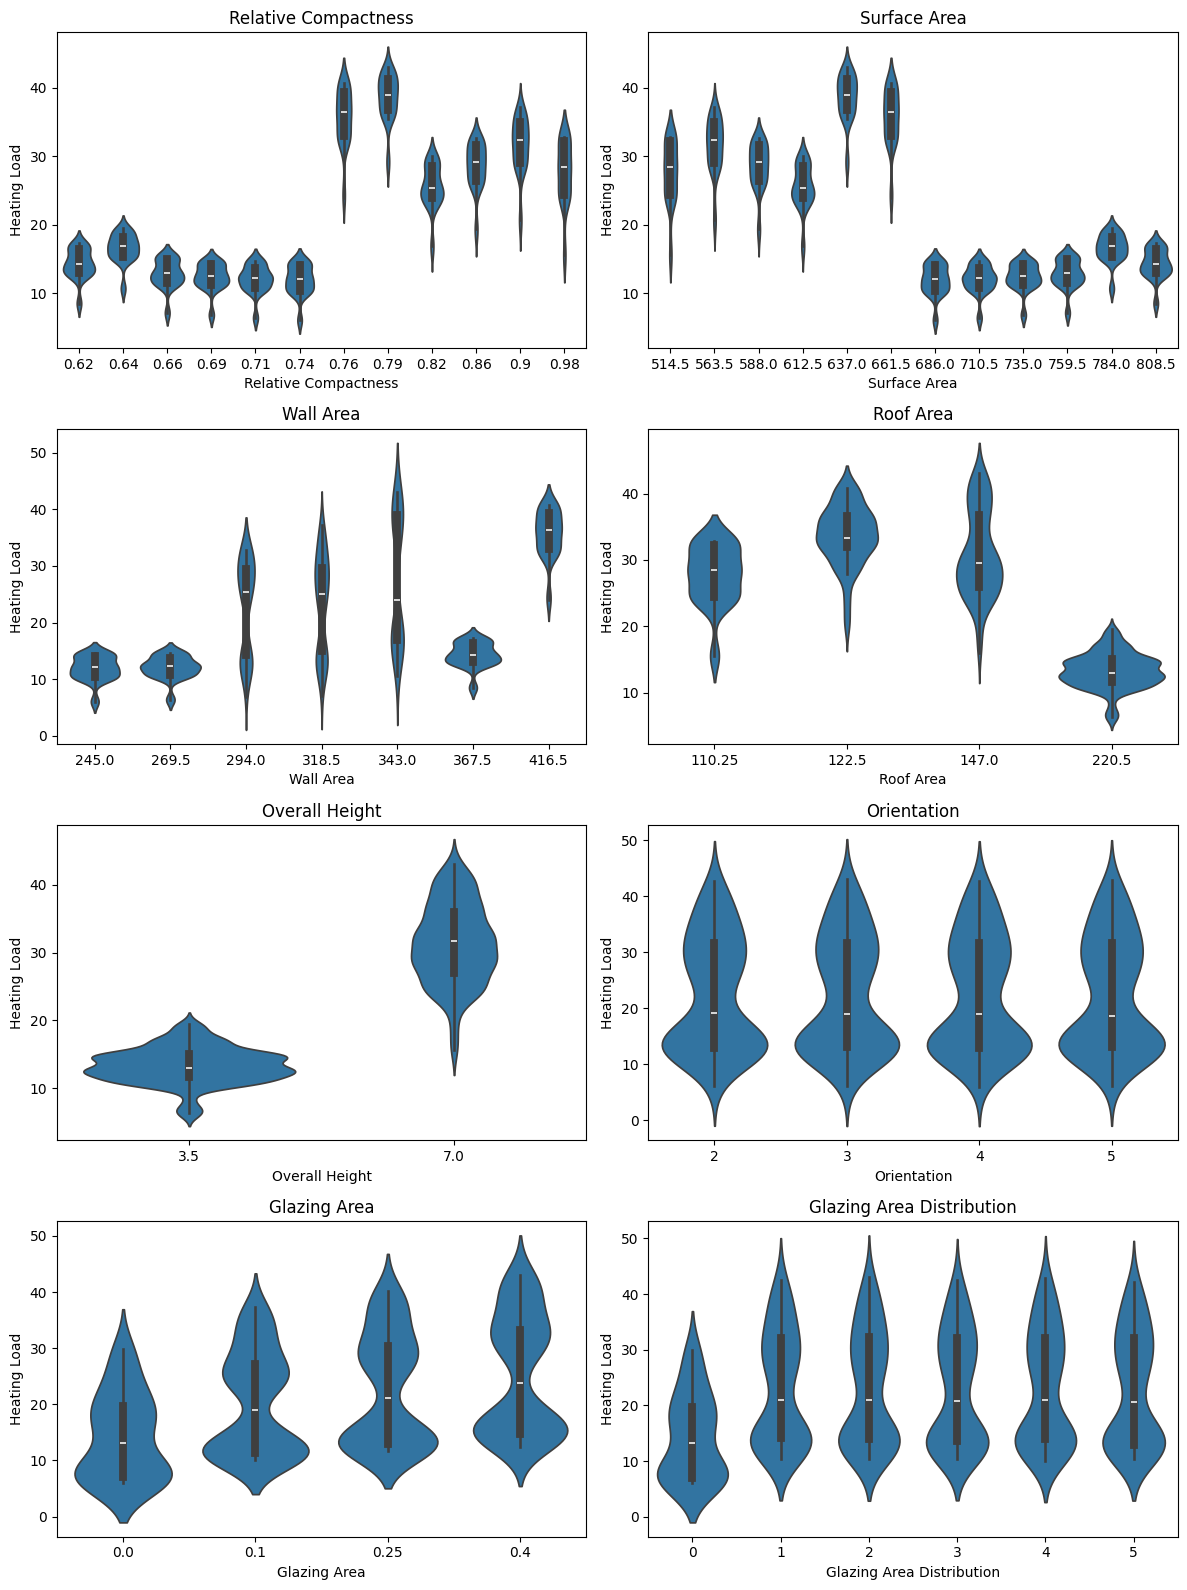

In [6]:
features  = cols[:-2]
fig, ax = plt.subplots(4, 2, figsize=(12, 4*4))
ax = ax.flatten()

for i, label in enumerate(features):
    sns.violinplot(x=dataset[label], y=dataset['Heating Load'], ax=ax[i])
    ax[i].set_title(label)

for j in range(i + 1, len(ax)):
    ax[j].axis("off")

plt.tight_layout()
plt.show()

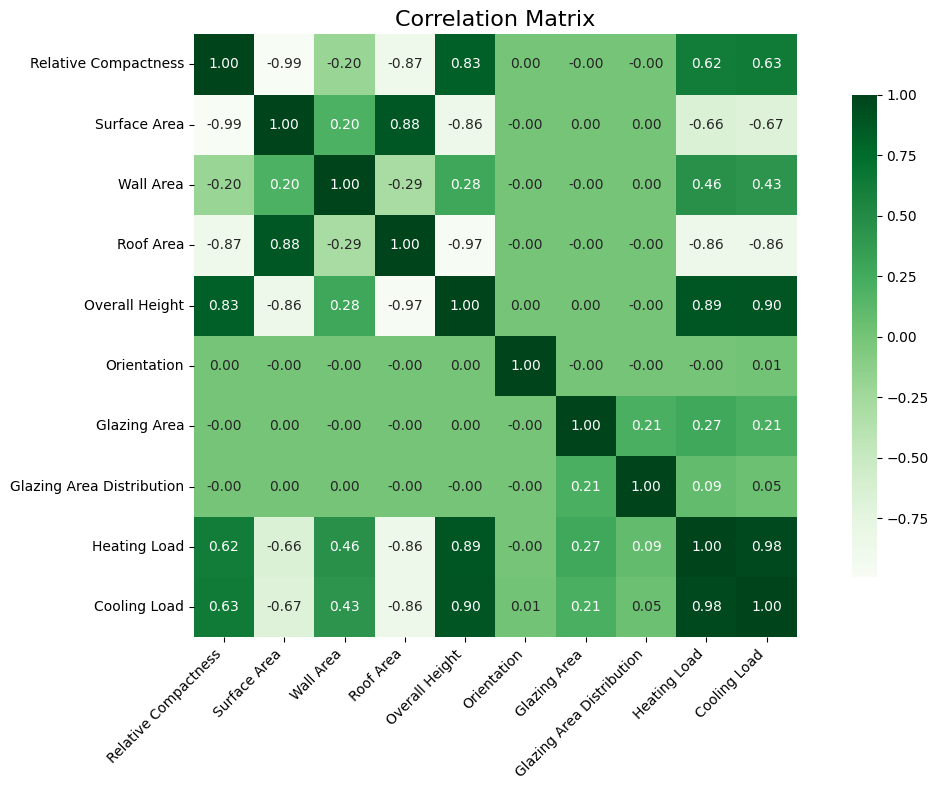

In [7]:
plt.figure(figsize=(12, 8)) 

sns.heatmap(
    dataset.corr(numeric_only=True),
    cmap="Greens",
    annot=True,
    fmt=".2f",       
    square=True,      
    cbar_kws={"shrink": 0.8} 
)

plt.title("Correlation Matrix", fontsize=16) 
plt.xticks(rotation=45, ha="right")           
plt.yticks(rotation=0)                        
plt.tight_layout()
plt.show()

1.2 Data cleaning

In [8]:
dataset.duplicated().sum()

np.int64(0)

In [9]:
dataset.isnull().sum()

Relative Compactness         0
Surface Area                 0
Wall Area                    0
Roof Area                    0
Overall Height               0
Orientation                  0
Glazing Area                 0
Glazing Area Distribution    0
Heating Load                 0
Cooling Load                 0
dtype: int64

In [10]:
dataset.nunique()

Relative Compactness          12
Surface Area                  12
Wall Area                      7
Roof Area                      4
Overall Height                 2
Orientation                    4
Glazing Area                   4
Glazing Area Distribution      6
Heating Load                 587
Cooling Load                 636
dtype: int64

1.3 Feature Transformation

In [11]:
scaler = MinMaxScaler()

In [12]:
dataset_scaledd = dataset.iloc[:,:-2]
dataset_scaledd

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0
...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5


In [13]:
scaled_values = scaler.fit_transform(dataset_scaledd)
dataset_scaled = pd.DataFrame(scaled_values, columns=dataset_scaledd.columns)
dataset_scaled

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution
0,1.000000,0.000000,0.285714,0.000000,1.0,0.000000,0.0,0.0
1,1.000000,0.000000,0.285714,0.000000,1.0,0.333333,0.0,0.0
2,1.000000,0.000000,0.285714,0.000000,1.0,0.666667,0.0,0.0
3,1.000000,0.000000,0.285714,0.000000,1.0,1.000000,0.0,0.0
4,0.777778,0.166667,0.428571,0.111111,1.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...
763,0.055556,0.916667,0.571429,1.000000,0.0,1.000000,1.0,1.0
764,0.000000,1.000000,0.714286,1.000000,0.0,0.000000,1.0,1.0
765,0.000000,1.000000,0.714286,1.000000,0.0,0.333333,1.0,1.0
766,0.000000,1.000000,0.714286,1.000000,0.0,0.666667,1.0,1.0


In [14]:
dataset = pd.concat([dataset_scaled, dataset.iloc[:,-2:]], axis=1)
dataset

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,1.000000,0.000000,0.285714,0.000000,1.0,0.000000,0.0,0.0,15.55,21.33
1,1.000000,0.000000,0.285714,0.000000,1.0,0.333333,0.0,0.0,15.55,21.33
2,1.000000,0.000000,0.285714,0.000000,1.0,0.666667,0.0,0.0,15.55,21.33
3,1.000000,0.000000,0.285714,0.000000,1.0,1.000000,0.0,0.0,15.55,21.33
4,0.777778,0.166667,0.428571,0.111111,1.0,0.000000,0.0,0.0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.055556,0.916667,0.571429,1.000000,0.0,1.000000,1.0,1.0,17.88,21.40
764,0.000000,1.000000,0.714286,1.000000,0.0,0.000000,1.0,1.0,16.54,16.88
765,0.000000,1.000000,0.714286,1.000000,0.0,0.333333,1.0,1.0,16.44,17.11
766,0.000000,1.000000,0.714286,1.000000,0.0,0.666667,1.0,1.0,16.48,16.61


1.4 Split dataset

In [15]:
X = dataset.iloc[:,:-2]
y_heating = dataset["Heating Load"]
y_cooling = dataset["Cooling Load"]

In [16]:
X_train, X_test, y_heating_train, y_heating_test, y_cooling_train, y_cooling_test = train_test_split(X, y_heating, y_cooling, test_size=0.2, random_state=42)

In [17]:
len(X_train), len(X_test), len(y_heating_test), len(y_heating_train), len(y_cooling_test), len(y_cooling_train)

(614, 154, 154, 614, 154, 614)

2. Model Selection

2.1 Linear Regression Model

In [18]:
model_linear = LinearRegression()

In [19]:
model_linear.fit(X_train, y_heating_train)

LinearRegression()

In [20]:
y_heating_test_pred = model_linear.predict(X_test)

In [21]:
mse = mean_squared_error(y_heating_test, y_heating_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_heating_test, y_heating_test_pred)

In [22]:
print("----------------------------------------------------")
print(" Linear Regression Model Summary")
print("----------------------------------------------------")
print(f"Intercept (bias): {model_linear.intercept_}")
print(f"Coefficients (weights):\n {model_linear.coef_}")
print("----------------------------------------------------")
print(f"Mean Squared Error (MSE): {mse:.6f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.6f}")
print(f"R² Score: {r2:.6f}")
print("----------------------------------------------------")

----------------------------------------------------
 Linear Regression Model Summary
----------------------------------------------------
Intercept (bias): 30.149699414687873
Coefficients (weights):
 [-22.27440753  -8.53153116   1.10909178 -12.23800182  14.43284222
  -0.09731734   8.05727699   1.05551417]
----------------------------------------------------
Mean Squared Error (MSE): 9.153208
Root Mean Squared Error (RMSE): 3.025427
R² Score: 0.912185
----------------------------------------------------


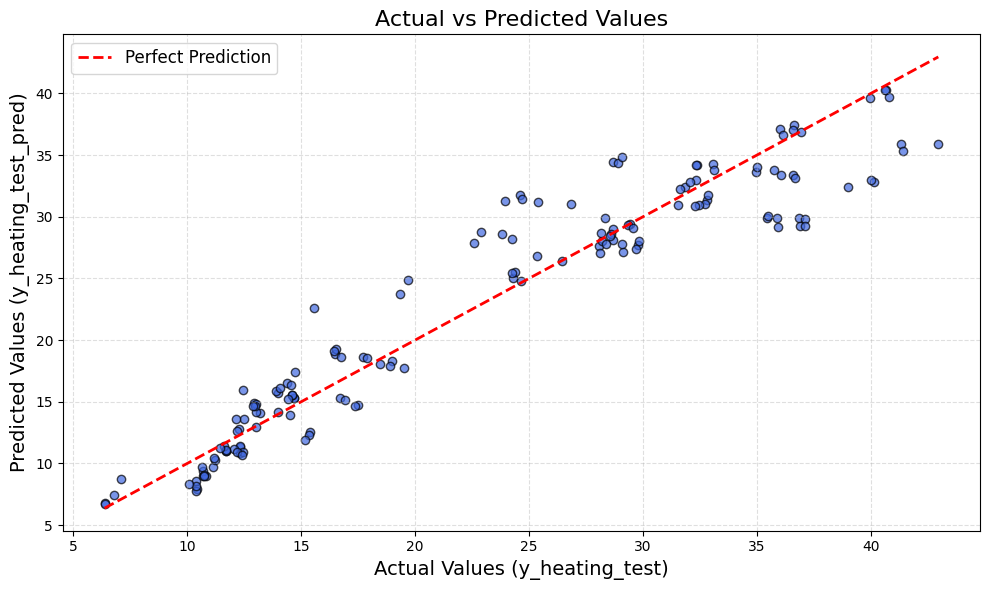

In [23]:
plt.figure(figsize=(10, 6))

plt.scatter(y_heating_test, y_heating_test_pred, color='royalblue', alpha=0.7, edgecolor='black')

min_val = min(y_heating_test.min(), y_heating_test_pred.min())
max_val = max(y_heating_test.max(), y_heating_test_pred.max())
plt.plot([min_val, max_val], [min_val, max_val],
         color='red', linestyle='--', linewidth=2,
         label='Perfect Prediction')

plt.title("Actual vs Predicted Values", fontsize=16)
plt.xlabel("Actual Values (y_heating_test)", fontsize=14)
plt.ylabel("Predicted Values (y_heating_test_pred)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

In [24]:
# plt.scatter(y_heating_test, y_heating_test_pred, label="Data", color="blue")
# x = tf.linspace(-20, 40, 100)
# plt.plot(X_test, model_linear.predict(np.array(X_test).reshape(-1, 1)), label="Fit", color="red", linewidth=3)
# plt.legend()
# plt.title("Bikes vs Temp")
# plt.ylabel("Number of bikes")
# plt.xlabel("Temp")
# plt.show()


# def try_parameters(w, b):
#     ages = non_smoker_df.age
#     target = non_smoker_df.charges

#     estimated_charges = estimate_charges(ages, w, b)

#     plt.plot(ages, estimated_charges, "r", alpha=0.9)
#     plt.scatter(ages, target, s=8, alpha=0.8)
#     plt.xlabel("Age")
#     plt.ylabel("Charges")
#     plt.legend(["Estimate", "Actual"])

# def estimate_output(x, w, b):
#     return w * x + b

2.2 SGD Regressor Model

In [25]:
model_sgd = SGDRegressor()

In [26]:
model_sgd.fit(X_train, y_heating_train)

SGDRegressor()

In [27]:
y_heating_test_pred_sgd = model_linear.predict(X_test)

In [28]:
mse = mean_squared_error(y_heating_test, y_heating_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_heating_test, y_heating_test_pred)

In [29]:
print("----------------------------------------------------")
print(" Linear Regression Model Summary")
print("----------------------------------------------------")
print(f"Intercept (bias): {model_linear.intercept_}")
print(f"Coefficients (weights):\n {model_linear.coef_}")
print("----------------------------------------------------")
print(f"Mean Squared Error (MSE): {mse:.6f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.6f}")
print(f"R² Score: {r2:.6f}")
print("----------------------------------------------------")

----------------------------------------------------
 Linear Regression Model Summary
----------------------------------------------------
Intercept (bias): 30.149699414687873
Coefficients (weights):
 [-22.27440753  -8.53153116   1.10909178 -12.23800182  14.43284222
  -0.09731734   8.05727699   1.05551417]
----------------------------------------------------
Mean Squared Error (MSE): 9.153208
Root Mean Squared Error (RMSE): 3.025427
R² Score: 0.912185
----------------------------------------------------


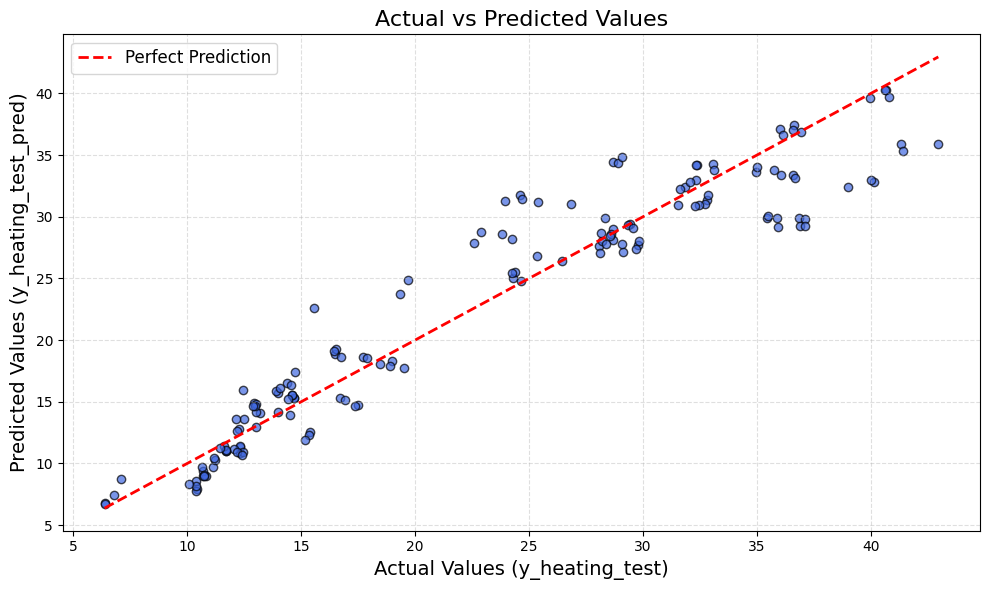

In [30]:
plt.figure(figsize=(10, 6))

plt.scatter(y_heating_test, y_heating_test_pred, color='royalblue', alpha=0.7, edgecolor='black')

min_val = min(y_heating_test.min(), y_heating_test_pred.min())
max_val = max(y_heating_test.max(), y_heating_test_pred.max())
plt.plot([min_val, max_val], [min_val, max_val],
         color='red', linestyle='--', linewidth=2,
         label='Perfect Prediction')

plt.title("Actual vs Predicted Values", fontsize=16)
plt.xlabel("Actual Values (y_heating_test)", fontsize=14)
plt.ylabel("Predicted Values (y_heating_test_pred)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

2.3 TensorFlow Linear Model

In [51]:
tf.random.set_seed(42)

model_linear_tf = tf.keras.Sequential([ 
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

model_linear_tf.compile(loss = tf.keras.losses.mae, optimizer= tf.keras.optimizers.Adam(), metrics=["mae"])

history = model_linear_tf.fit(X_train, y_heating_train, epochs=50, verbose=0)

In [52]:
model_linear_tf.evaluate(X_test, y_heating_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2.4221 - mae: 2.4221 


[2.372314929962158, 2.372314929962158]

In [53]:
y_heating_test_pred_tf_linear = model_linear_tf.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


In [54]:
tf.keras.metrics.MeanAbsoluteError()(y_heating_test, tf.squeeze(y_heating_test_pred_tf_linear))

<tf.Tensor: shape=(), dtype=float32, numpy=2.372314929962158>

In [55]:
tf.keras.metrics.MeanSquaredError()(y_heating_test, tf.squeeze(y_heating_test_pred_tf_linear))

<tf.Tensor: shape=(), dtype=float32, numpy=10.760944366455078>

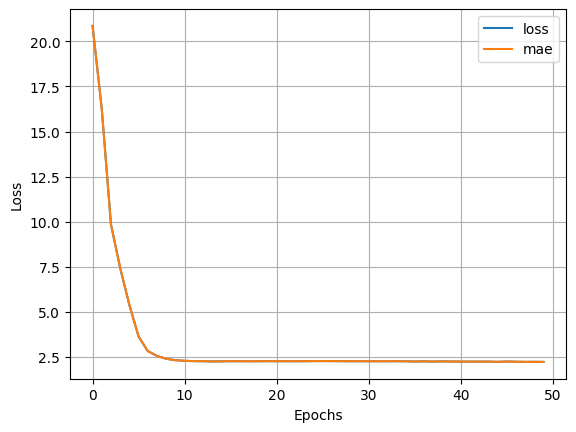

In [56]:
pd.DataFrame(history.history).plot()
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.grid(True)

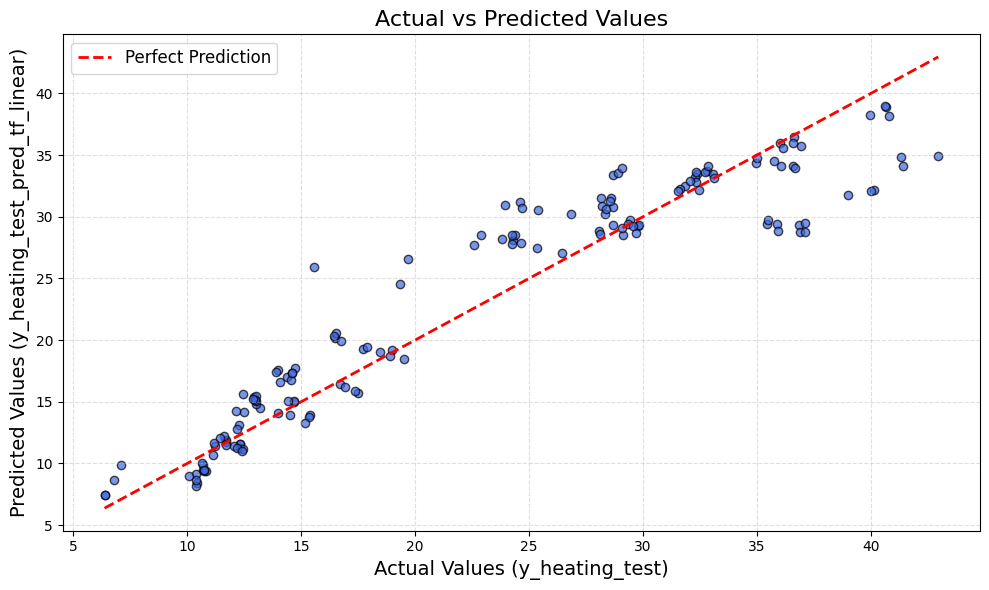

In [63]:
plt.figure(figsize=(10, 6))

plt.scatter(y_heating_test, y_heating_test_pred_tf_linear, color='royalblue', alpha=0.7, edgecolor='black')

min_val = min(y_heating_test.min(),y_heating_test_pred_tf_linear.min())
max_val = max(y_heating_test.max(), y_heating_test_pred_tf_linear.max())
plt.plot([min_val, max_val], [min_val, max_val],
         color='red', linestyle='--', linewidth=2,
         label='Perfect Prediction')

plt.title("Actual vs Predicted Values", fontsize=16)
plt.xlabel("Actual Values (y_heating_test)", fontsize=14)
plt.ylabel("Predicted Values (y_heating_test_pred_tf_linear)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

2.4 TensorFlow NeuralNetwork Model

In [57]:
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1, activation="relu")
])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss="mean_squared_error")

history = nn_model.fit(X_train, y_heating_train, epochs = 100, verbose= 0)

In [58]:
# plot_history(history)